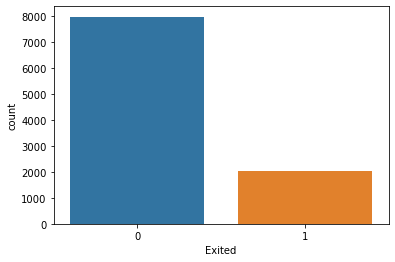

[[1553   42]
 [ 380   25]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# perform EDA
sns.countplot(x='Exited', data=df)
plt.show()

# encode categorical variables
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# split the data into training and testing sets
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))